# Task 8 : Practical analysis of advanced algorithms

## Goal 
Practical analysis of advanced algorithms

## Task for the students well-experienced in algorithm analysis:

I. Choose an algorithm (interesting to you and not considered in the course) from the above-mentioned book sections.
II. Choose an algorithm interesting to you and proposed at most 10 years ago in a research paper for solving a certain practical problem (including optimization algorithms, graph algorithms, etc.).
III. Analyse the chosen algorithms in terms of time and space complexity, design technique used, etc. Implement the algorithms (or use the existing ones from the research paper) and produce several experiments. Your experiments should differ of those in the research paper. Analyse the results.

## Content 
### 1- code for Part 1 : greedy algorithm for activity selection problem
### 2- visulaization 

In [70]:
from random import randrange
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
n= 100
maxtime = 100 
activites = []
start_times= [] 
finish_times = sorted([randrange(maxtime)  for i in range (n)])
activites.append('a0_dummy')
start_times.append(0)
for i in range (1,n):
    activites.append('a'+str(i))
    start_time = randrange(finish_times[i])
    start_times.append(start_time)
for i in range (n )  : 
    print (" %s : start time : %i  finish time :%i " % (activites[i],start_times[i],finish_times[i]) )
    print()


 a0_dummy : start time : 0  finish time :0 

 a1 : start time : 0  finish time :3 

 a2 : start time : 0  finish time :4 

 a3 : start time : 1  finish time :4 

 a4 : start time : 1  finish time :4 

 a5 : start time : 1  finish time :5 

 a6 : start time : 0  finish time :6 

 a7 : start time : 1  finish time :7 

 a8 : start time : 4  finish time :10 

 a9 : start time : 7  finish time :11 

 a10 : start time : 1  finish time :11 

 a11 : start time : 0  finish time :11 

 a12 : start time : 8  finish time :12 

 a13 : start time : 10  finish time :13 

 a14 : start time : 3  finish time :13 

 a15 : start time : 12  finish time :14 

 a16 : start time : 4  finish time :15 

 a17 : start time : 12  finish time :18 

 a18 : start time : 17  finish time :18 

 a19 : start time : 16  finish time :18 

 a20 : start time : 6  finish time :19 

 a21 : start time : 0  finish time :22 

 a22 : start time : 20  finish time :23 

 a23 : start time : 23  finish time :24 

 a24 : start time : 3

In [55]:
ac_time_cost = [] 
def activity_selector (s,f,k,n,activites) : 
    m = k+1 
    while m<n and s[m] < f[k] : 
        m=m+1
    if m<n :  
        #if k ==0 : 
        #    return activites[k]+' '+activites[m] + ' ' +  activity_selector(s,f,m,n,activites)
        #else : 
            return activites[m] + ' ' +  activity_selector(s,f,m,n,activites)
    else : return ''

In [56]:
start = time.time ()
result = activity_selector(start_times,finish_times,0,n,activites)
end= time.time()
ac_time_cost.append((end-start))
print(result)
print(len(result))

a1 a8 a13 a18 a22 a23 a27 a35 a42 a51 a55 a65 a71 a85 
54


In [57]:
print(ac_time_cost)

[0.00019407272338867188]


In [40]:
print(np.average(ac_time_cost))

0.00015082359313964844


In [81]:
#run experiement on values of n in range [1,2000]
ac_time_cost = [] 
maxtime = 100 
for n in range (1,2001) : 
    #generate data   
    activites = []
    start_times= [] 
    finish_times = sorted([randrange(2,maxtime)  for i in range (n)])
    activites.append('a0_dummy')
    start_times.append(0)
    for i in range (1,n):
        activites.append('a'+str(i))
        start_time = randrange(finish_times[i])
        start_times.append(start_time)
    start = time.time ()
    result = activity_selector(start_times,finish_times,0,n,activites)
    end= time.time()
    ac_time_cost.append((end-start))

### visulaiztion 

In [77]:
#some helper functions 
def func_cal_poly(param,x) :
    ret = 0 
    for t in range (len(param)) : 
        ret+= param[t] * (x ** (len(param)-t-1) )
    return ret 

def calculate_poly(param) :
    
    x = np.arange(2000)
    y= [func_cal_poly(param,i) for i in x]
    return y 

[1.05513655e-07 4.97649492e-06]


<ipython-input-82-dbd7b2c57a3d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


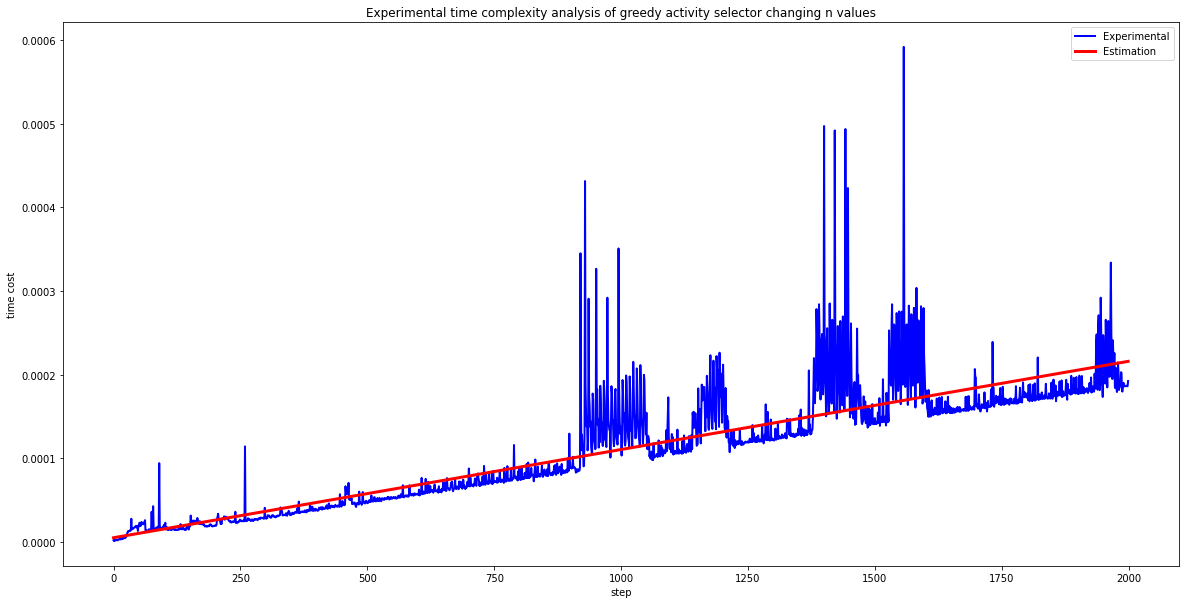

In [82]:
deg = 1
param = np.polyfit(np.array(range(2000)),np.array(ac_time_cost),deg)
print(param)
est = calculate_poly(param)

fig = plt.figure(figsize=(20,10))
plt.title("Experimental time complexity analysis of greedy activity selector changing n values")
plt.xlabel("step")
plt.ylabel("time cost")
ax = plt.axes()

ax.plot(range(2000),np.array(ac_time_cost),color='blue', label='Experimental',linewidth=2)
ax.plot(range(2000),est,color='red', label='Estimation',linewidth=3)
plt.legend();

In [ ]:
deg = 1
param = np.polyfit(np.array(range(2000)),np.array(ac_time_cost),deg)
print(param)
est = calculate_poly(param)

fig = plt.figure(figsize=(20,10))
plt.title("Experimental time complexity analysis of greedy activity selector changing n values")
plt.xlabel("step")
plt.ylabel("time cost")
ax = plt.axes()

ax.plot(range(2000),np.array(ac_time_cost),color='blue', label='Experimental',linewidth=2)
ax.plot(range(2000),est,color='red', label='Estimation',linewidth=3)
plt.legend();